In [2]:
working_dir = "../data/"
%cd $working_dir

/home/ander/Projects/adatos-ta/data


In [3]:
!pwd

/home/ander/Projects/adatos-ta/data


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pyreadstat

In [5]:
df = pd.read_csv("datos_post_step4a_no_dummies.csv")
df.head(5)

,tipo_persona,tipo_contribuyente,distrito_fiscal,porcentaje_propiedad,clase_vehiculo,categoria_vehiculo,valor_adquisicion_pen,valor_referencial_2025_pen,anios_desde_inscripcion,base_imponible,marca_agrupada,valor_adquisicion_log,valor_referencial_log,base_imponible_log,valor_adquisicion_scaled,valor_referencial_scaled,base_imponible_scaled
0,natural,pequeno,ANCON,100.0,camioneta,b1234_pickup_otros,149323.8,126060,3,149323.8,FORD,11.913879,11.744521,11.913879,0.780557,0.808453,0.770073
1,natural,pequeno,ANCON,100.0,camioneta,b1234_pickup_otros,52462.5,48930,1,52462.5,CHEVROLET,10.867873,10.798166,10.867873,-0.619207,-0.543770,-0.668268
2,natural,pequeno,ANCON,100.0,camioneta,b1234_pickup_otros,158062.8,136190,2,158062.8,OTROS,11.970754,11.821814,11.970754,0.856667,0.918894,0.848280
3,soc_conyugal,pequeno,ANCON,100.0,automovil,a2_1051_1500cc,58068.2,40850,3,58068.2,HYUNDAI,10.969391,10.617687,10.969391,-0.483356,-0.801653,-0.528673
4,natural,pequeno,ANCON,100.0,camioneta,b1234_pickup_otros,58217.6,64070,2,64070.0,JETOUR,10.971960,11.067747,11.067747,-0.479917,-0.158573,-0.393425


In [6]:
df.dtypes

tipo_persona                   object
tipo_contribuyente             object
distrito_fiscal                object
porcentaje_propiedad          float64
clase_vehiculo                 object
categoria_vehiculo             object
valor_adquisicion_pen         float64
valor_referencial_2025_pen      int64
anios_desde_inscripcion         int64
base_imponible                float64
marca_agrupada                 object
valor_adquisicion_log         float64
valor_referencial_log         float64
base_imponible_log            float64
valor_adquisicion_scaled      float64
valor_referencial_scaled      float64
base_imponible_scaled         float64
dtype: object

In [7]:
df = df.drop(columns=['valor_adquisicion_log', 'valor_referencial_log', 'base_imponible_log', 'valor_adquisicion_pen', 'valor_referencial_2025_pen', 'base_imponible'])
df.head(5)

,tipo_persona,tipo_contribuyente,distrito_fiscal,porcentaje_propiedad,clase_vehiculo,categoria_vehiculo,anios_desde_inscripcion,marca_agrupada,valor_adquisicion_scaled,valor_referencial_scaled,base_imponible_scaled
0,natural,pequeno,ANCON,100.0,camioneta,b1234_pickup_otros,3,FORD,0.780557,0.808453,0.770073
1,natural,pequeno,ANCON,100.0,camioneta,b1234_pickup_otros,1,CHEVROLET,-0.619207,-0.543770,-0.668268
2,natural,pequeno,ANCON,100.0,camioneta,b1234_pickup_otros,2,OTROS,0.856667,0.918894,0.848280
3,soc_conyugal,pequeno,ANCON,100.0,automovil,a2_1051_1500cc,3,HYUNDAI,-0.483356,-0.801653,-0.528673
4,natural,pequeno,ANCON,100.0,camioneta,b1234_pickup_otros,2,JETOUR,-0.479917,-0.158573,-0.393425


In [8]:
df.describe()

,porcentaje_propiedad,anios_desde_inscripcion,valor_adquisicion_scaled,valor_referencial_scaled,base_imponible_scaled
count,251817.000000,251817.000000,251817.000000,251817.000000,251817.000000
mean,97.980413,1.985835,0.083525,0.159056,0.163785
std,9.956788,0.801196,1.241697,0.829180,0.856311
min,1.000000,1.000000,-15.162577,-4.518212,-4.526835
25%,100.000000,1.000000,-0.442020,-0.437714,-0.438945
50%,100.000000,2.000000,0.000000,0.000000,0.000000
75%,100.000000,3.000000,0.557980,0.562286,0.561055
max,100.000000,3.000000,6.126406,4.276310,6.263251


In [9]:
df = df.drop(columns=['porcentaje_propiedad'])
df.head(5)

,tipo_persona,tipo_contribuyente,distrito_fiscal,clase_vehiculo,categoria_vehiculo,anios_desde_inscripcion,marca_agrupada,valor_adquisicion_scaled,valor_referencial_scaled,base_imponible_scaled
0,natural,pequeno,ANCON,camioneta,b1234_pickup_otros,3,FORD,0.780557,0.808453,0.770073
1,natural,pequeno,ANCON,camioneta,b1234_pickup_otros,1,CHEVROLET,-0.619207,-0.543770,-0.668268
2,natural,pequeno,ANCON,camioneta,b1234_pickup_otros,2,OTROS,0.856667,0.918894,0.848280
3,soc_conyugal,pequeno,ANCON,automovil,a2_1051_1500cc,3,HYUNDAI,-0.483356,-0.801653,-0.528673
4,natural,pequeno,ANCON,camioneta,b1234_pickup_otros,2,JETOUR,-0.479917,-0.158573,-0.393425


In [10]:
from kmodes.kprototypes import KPrototypes

modelo1 = KPrototypes(random_state=2025, init='random', n_jobs=-1) 

In [11]:
categorical_columns_pos = [df.columns.get_loc(col) for col in list(df.select_dtypes(include=['object', 'category']).columns)]
categorical_columns_pos

[0, 1, 2, 3, 4, 6]

In [12]:
df_sample = df.sample(10000, random_state=2025)
df_sample_matrix = df_sample.to_numpy()
df_sample_matrix

array([['juridica', 'mediano', 'LOS OLIVOS', ..., -1.2067538187814155,
        -1.236095460184612, -1.2720073380090045],
       ['juridica', 'pequeno', 'CHORRILLOS', ..., -0.0699428710100309,
        0.1499261504937451, -0.0965409032520548],
       ['juridica', 'pequeno', 'SAN MARTIN DE PORRES', ...,
        -0.6576655570516368, -0.5414358921322454, -0.7077864960490137],
       ...,
       ['juridica', 'grande', 'LA VICTORIA', ..., -0.3615882052625618,
        -0.202736316544963, -0.4035494100376441],
       ['natural', 'pequeno', 'SANTIAGO DE SURCO', ...,
        0.2578020371237553, 0.3507742588190548, 0.2329108977461628],
       ['natural', 'pequeno', 'SAN JUAN DE MIRAFLORES', ...,
        -0.4766872683760872, -0.4447811215654858, -0.5218205420668309]],
      shape=(10000, 10), dtype=object)

In [13]:
cost = []
for cluster in range(1, 11):
    try:
        kprototype = KPrototypes(n_clusters=cluster, max_iter=30, n_init=5, random_state=2025, init='random', n_jobs=-1)
        kprototype.fit_predict(df_sample_matrix, categorical=categorical_columns_pos)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except Exception as e:
        print(f"Error en cluster {cluster}: {e}")
        break

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9
Cluster initiation: 10


In [14]:
df_cost = pd.DataFrame({'Cluster':range(1, 11), 'Cost':cost})
df_cost

,Cluster,Cost
0,1,51328.936707
1,2,37851.086339
2,3,30981.446952
3,4,26068.201728
4,5,23022.008966
5,6,21445.327881
6,7,20262.864118
7,8,19313.154690
8,9,18529.021932
9,10,18032.130301


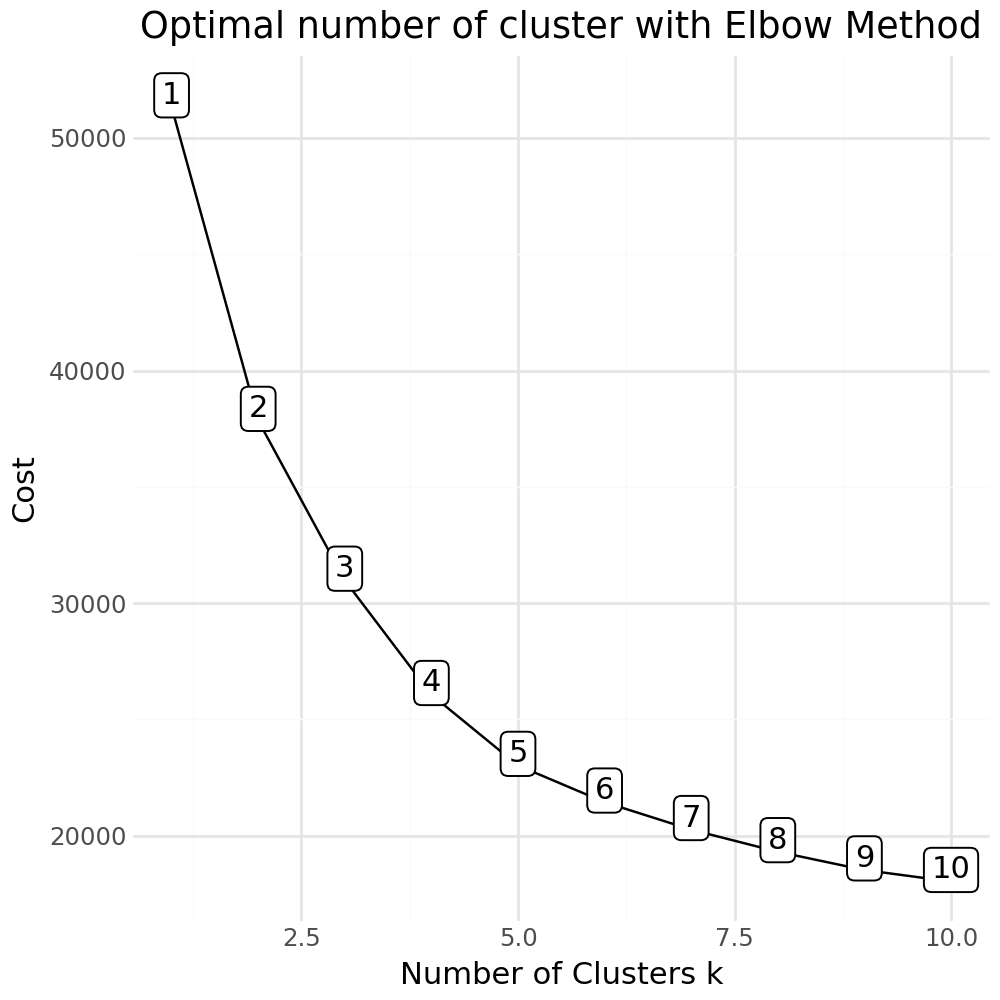

In [15]:
from plotnine import *
import plotnine

plotnine.options.figure_size = (5, 5)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 11,
               nudge_y = 500) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    #xlim(0, 11.5) +
    #ylim(230, 500) +
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

In [16]:
from numba import jit, cuda
# function optimized to run on gpu
jit(target ="cuda")

ModuleNotFoundError: No module named 'numba'

In [17]:
# Selecciona una muestra del DataFrame original
df_sample = df.sample(100000, random_state=2025)

# Convierte la muestra a matriz numpy
df_sample_matrix = df_sample.to_numpy()
print(df_sample_matrix)

[['juridica' 'mediano' 'LOS OLIVOS' ... -1.2067538187814155
  -1.236095460184612 -1.2720073380090045]
 ['juridica' 'pequeno' 'CHORRILLOS' ... -0.0699428710100309
  0.1499261504937451 -0.0965409032520548]
 ['juridica' 'pequeno' 'SAN MARTIN DE PORRES' ... -0.6576655570516368
  -0.5414358921322454 -0.7077864960490137]
 ...
 ['juridica' 'grande' 'SAN ISIDRO' ... 0.1734013801113334
  -0.4199309651111036 0.1461842035503935]
 ['natural' 'pequeno' 'SAN MARTIN DE PORRES' ... -0.5583292065812049
  -0.5237616107934341 -0.6057124886333491]
 ['soc_conyugal' 'mediano' 'MIRAFLORES' ... -0.4476940742730521
  -0.683871949253789 -0.4920283109665157]]


In [18]:
modelo1 = KPrototypes(n_clusters = 5, max_iter= 25, n_init= 3, random_state = 2025, init = 'Huang', n_jobs = -1, verbose=1)
modelo1.fit_predict(df_sample_matrix, categorical = categorical_columns_pos)

Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing centroids
Starting iterations...
Starting iterations...
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/25, moves: 30171, ncost: 275363.7929058499
Run: 2, iteration: 1/25, moves: 43196, ncost: 282359.5546504869
Run: 1, iteration: 1/25, moves: 32020, ncost: 291537.0229638993
Run: 3, iteration: 2/25, moves: 13844, ncost: 272134.2460929932
Run: 2, iteration: 2/25, moves: 15681, ncost: 273616.9299367134
Run: 1, iteration: 2/25, moves: 16114, ncost: 280664.6464948954
Run: 3, iteration: 3/25, moves: 7518, ncost: 270219.5320064701
Run: 2, iteration: 3/25, moves: 5057, ncost: 271388.6287451812
Run: 1, iteration: 3/25, moves: 13365, ncost: 273871.7138050045
Run: 3, iteration: 4/25, moves: 5066, ncost: 269532.13873727625
Run: 2, iteration: 4/25, moves: 2739, ncost: 270850.27239846217
R

array([1, 4, 4, ..., 4, 1, 1], shape=(100000,), dtype=uint16)

In [24]:
modelo1.cluster_centroids_

array([['2.057106138992322', '0.658009966688881', '0.6255089433847975',
        '0.6644738775723346', 'natural', 'pequeno', 'SANTIAGO DE SURCO',
        'camioneta', 'b1234_pickup_otros', 'TOYOTA'],
       ['2.577353637506211', '-0.45248946460590833',
        '-0.4124995417713763', '-0.40493864881874364', 'natural',
        'pequeno', 'SANTIAGO DE SURCO', 'camioneta',
        'b1234_pickup_otros', 'OTROS'],
       ['2.451776649746193', '-12.658669732272342',
        '0.06484878144754991', '-0.1784151423164106', 'natural',
        'pequeno', 'SAN ISIDRO', 'camioneta', 'b1234_pickup_otros',
        'TOYOTA'],
       ['1.9107363225010283', '2.301516495562711', '2.2512840417207287',
        '2.3588811649314754', 'juridica', 'pequeno', 'SAN ISIDRO',
        'camion', 'c1_camiones', 'OTROS'],
       ['1.2021763412964364', '-0.2716659367565833',
        '-0.19902073853998734', '-0.2576346528426815', 'juridica',
        'pequeno', 'SAN ISIDRO', 'camioneta', 'b1234_pickup_otros',
        'TOYOT

In [25]:
modelo1.n_iter_

25

In [26]:
modelo1.cost_

np.float64(228541.67139854972)

In [27]:
df_sample['Cluster_modelo1'] = modelo1.labels_
df_sample['Cluster_modelo1']

87981     1
29771     4
193836    4
206818    0
21218     4
         ..
143642    1
218779    3
147617    4
196979    1
112168    1
Name: Cluster_modelo1, Length: 100000, dtype: uint16

In [28]:
df_sample['Cluster_modelo1'].value_counts()

Cluster_modelo1
1    34150
0    30321
4    27837
3     7298
2      394
Name: count, dtype: int64